2023-12-07 12:39:44.804 
  command:

    streamlit run D:\python\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


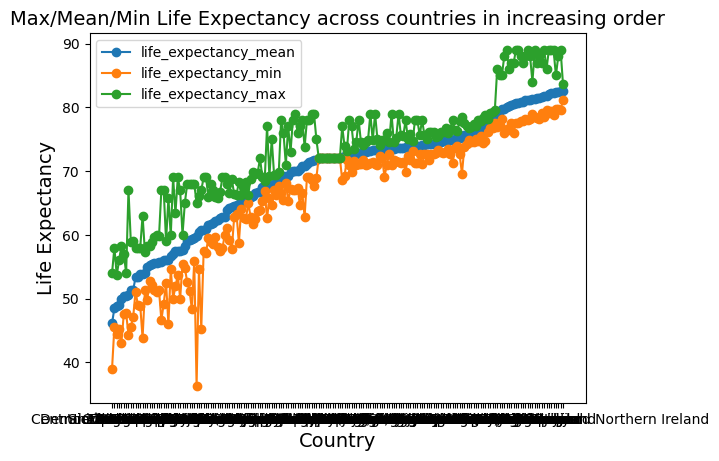

DeltaGenerator()

<Figure size 640x480 with 0 Axes>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st

st.title("Selectbox")
graphs = ["Linechart", "BarChart", "Scatterplot", "BoxPlot", "PieChart"]
graph_selected = st.selectbox("Choose a graph to visualize", options=graphs)

df = pd.read_csv("LifeExpectancy.csv")  # Replace 'your_new_dataset.csv' with the actual path to your dataset file

if graph_selected == "Linechart":
    data = df.groupby('Country').agg({"Life expectancy": ["mean", "min", "max"]})
    data.columns = ['life_expectancy_mean', 'life_expectancy_min', 'life_expectancy_max']
    data = data.reset_index()
    data = data.sort_values(by=['life_expectancy_mean'], ascending=True)

    # Plotting
    plt.plot(data['Country'], data['life_expectancy_mean'], label='life_expectancy_mean', marker='o')
    plt.plot(data['Country'], data['life_expectancy_min'], label='life_expectancy_min', marker='o')
    plt.plot(data['Country'], data['life_expectancy_max'], label='life_expectancy_max', marker='o')
    plt.title('Max/Mean/Min Life Expectancy across countries in increasing order', fontsize=14)
    plt.xlabel('Country', fontsize=14)
    plt.ylabel('Life Expectancy', fontsize=14)
    plt.legend()
    Line_chart = plt.show()

    st.set_option('deprecation.showPyplotGlobalUse', False)
    st.subheader("Line Chart:", divider='rainbow')
    st.pyplot(Line_chart)
    st.subheader('A few basic insights of the given graph:', divider='rainbow')
    st.write('''• Insight 1
                  • Insight 2
                  • Insight 3''')

elif graph_selected == "BarChart":
    data = df.groupby('Country').agg({"GDP": ["mean", "min", "max"]})
    data.columns = ['gdp_mean', 'gdp_min', 'gdp_max']
    data = data.reset_index()
    data = data.sort_values(by=['gdp_mean'], ascending=True)

    # Bar chart properties
    x = np.arange(len(data['Country']))
    width = 0.3

    # Draw grouped bar chart
    fig, ax = plt.subplots()
    bar1 = ax.bar(x - width / 2, data['gdp_max'], width, label='gdp_max')
    bar2 = ax.bar(x + width / 2, data['gdp_mean'], width, label='gdp_mean')

    ax.set_xlabel('Country')
    ax.set_ylabel('GDP')
    ax.set_title('Mean and max GDP of countries')
    ax.set_xticks(x, data['Country'])
    ax.legend()

    # Setting bar labels
    ax.bar_label(bar1)
    ax.bar_label(bar2)

    fig.tight_layout()

    Bar_Chart = plt.show()
    st.set_option('deprecation.showPyplotGlobalUse', False)
    st.subheader("Bar Chart:", divider='rainbow')
    st.pyplot(Bar_Chart)
    st.subheader('A few basic insights of the given graph:', divider='rainbow')
    st.write('''• Insight 1
                  • Insight 2
                  • Insight 3''')

elif graph_selected == "Scatterplot":
    # Scatter plot properties
    colors = ['b', 'y', 'm', 'r']
    country_data = df[df['Country'] == 'Afghanistan']
    other_country_data = df[df['Country'] == 'Albania']

    lo = plt.scatter(country_data['Year'], country_data['Life expectancy'], marker='x', color=colors[0])
    ll = plt.scatter(other_country_data['Year'], other_country_data['Life expectancy'], marker='o', color=colors[1])

    plt.title("Life Expectancy Scatter plot of Afghanistan vs Albania")
    plt.xlabel("Year")
    plt.ylabel("Life Expectancy")
    plt.legend((lo, ll),
               ('Afghanistan', 'Albania'),
               scatterpoints=1,
               loc='upper left',
               ncol=3,
               fontsize=8)

    Scatter_plot = plt.show()
    st.set_option('deprecation.showPyplotGlobalUse', False)
    st.subheader("Scatter Plot:", divider='rainbow')
    st.pyplot(Scatter_plot)
    st.subheader('A few basic insights of the given graph:', divider='rainbow')
    st.write('''• Insight 1
                  • Insight 2
                  • Insight 3''')

elif graph_selected == "BoxPlot":
    # Box plot properties
    ax = df[['Life expectancy', 'Adult Mortality']].plot(kind='box', title='Boxplot')
    plt.title("Distribution of Life Expectancy and Adult Mortality")
    plt.xlabel("Feature")
    plt.ylabel("Value")

    # Show plot
    Box_Plot = plt.show()
    st.set_option('deprecation.showPyplotGlobalUse', False)
    st.subheader("Box Plot:", divider='rainbow')
    st.pyplot(Box_Plot)
    st.subheader('A few basic insights of the given graph:', divider='rainbow')
    st.write('''• Insight 1
                  • Insight 2
                  • Insight 3''')

elif graph_selected == "PieChart":
    data = df.groupby('Country').agg({"Life expectancy": "mean"})
    data = data.reset_index()

    # Pie chart
    plt.pie(data['Life expectancy'], labels=data['Country'], autopct='%1.1f%%')
    plt.title('Mean Life Expectancy across countries')
    plt.show()

    Pie_Chart = plt.show()
    st.set_option('deprecation.showPyplotGlobalUse', False)
    st.subheader("Pie Chart:")
    st.pyplot(Pie_Chart)
    st.subheader('A few basic insights of the given graph:', divider='rainbow')
    st.write('''• Insight 1
                  • Insight 2
                  • Insight 3''')

st.write('The transformed data used to populate the chart: ')
data = data.reset_index(drop=True)
st.subheader("The aggregated value of each country:", divider='rainbow')
st.table(data)
